In [1]:
import numpy as np
import pandas as pd
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(os.listdir("UTKFace_aligned&cropped/"))

C:\Users\pawan\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['crop_part1', 'crop_part1.tar.gz', 'UTKFace', 'UTKFace.tar.gz']


# FEATURE EXTRACTION

In [2]:
onlyfiles = os.listdir("UTKFace_aligned&cropped/UTKFace/UTKFace/")
y = np.array([[[i.split('_')[0]],[i.split('_')[1]]] for i in onlyfiles])
# y = np.array([[i.split('_')[1] for i in onlyfiles]]).T
print(y.shape)

(23708, 2, 1)


In [3]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread("UTKFace_aligned&cropped/UTKFace/UTKFace/"+file,cv2.IMREAD_COLOR)
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face =cv2.resize(face, (32,32) )
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

In [4]:
X=np.squeeze(X_data)

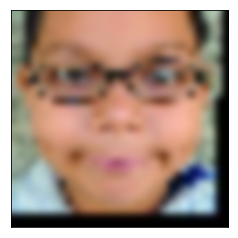

[['13']
 ['0']]


In [5]:
def imshow(img):
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()
imshow(X[420])
print(y[420])

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
y_train=[y_train[:,1],y_train[:,0]]
y_valid=[y_valid[:,1],y_valid[:,0]]

# BUILD MODEL

In [9]:
def make_model():
    inputs=tf.keras.layers.Input(shape=(32,32,3))
    x=inputs
    x=layers.Conv2D(32,3,activation='relu')(x)
    x=layers.Conv2D(32,3,activation='relu')(x)
    x=layers.MaxPooling2D(2,2)(x)
    x=layers.Dropout(0.3)(x)
    x=layers.Conv2D(64,3,activation='relu')(x)
    x=layers.Conv2D(64,3,activation='relu')(x)
    x=layers.MaxPooling2D(2,2)(x)
    x=layers.Dropout(0.3)(x)
    x=layers.Conv2D(84,3,activation='relu')(x)
    x=layers.Conv2D(84,3,activation='relu')(x)
    x=layers.Dropout(0.3)(x)
    x=layers.Flatten()(x)
    x1=layers.Dense(64,activation='relu')(x)
    x2=layers.Dense(64,activation='relu')(x)
    x1=layers.Dense(1,activation='sigmoid',name='sex')(x1)
    x2=layers.Dense(1,activation='relu',name='age')(x2)
    model=tf.keras.models.Model(inputs=inputs,outputs=[x1,x2])
    model.compile(optimizer='Adam',loss=['binary_crossentropy','mae'])
    return model
model=make_model()


# TRAIN

In [10]:
import random
random_id=random.random()
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/'+str(random_id))
]
model.fit(X_train, y_train, epochs=2000,batch_size=240,validation_data=(X_valid,y_valid),callbacks=callbacks, shuffle=True)

Train on 18966 samples, validate on 4742 samples
Epoch 1/2000
18966/18966 [==============================] - 96s 5ms/sample - loss: 17.1063 - sex_loss: 1.0783 - age_loss: 16.0280 - val_loss: 22.2186 - val_sex_loss: 0.6249 - val_age_loss: 21.5938
Epoch 2/2000
18966/18966 [==============================] - 95s 5ms/sample - loss: 13.5809 - sex_loss: 0.7002 - age_loss: 12.8807 - val_loss: 15.2495 - val_sex_loss: 0.5635 - val_age_loss: 14.6861
Epoch 3/2000
18966/18966 [==============================] - 95s 5ms/sample - loss: 12.1487 - sex_loss: 0.6422 - age_loss: 11.5065 - val_loss: 13.0018 - val_sex_loss: 0.6023 - val_age_loss: 12.3995
Epoch 4/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 11.6648 - sex_loss: 0.6265 - age_loss: 11.0382 - val_loss: 17.2062 - val_sex_loss: 0.5762 - val_age_loss: 16.6300
Epoch 5/2000
18966/18966 [==============================] - 95s 5ms/sample - loss: 11.1332 - sex_loss: 0.6044 - age_loss: 10.5288 - val_loss: 10.6293 - val_sex_los

Epoch 43/2000
18966/18966 [==============================] - 80s 4ms/sample - loss: 6.7858 - sex_loss: 0.3587 - age_loss: 6.4271 - val_loss: 11.5602 - val_sex_loss: 0.3736 - val_age_loss: 11.1866
Epoch 44/2000
18966/18966 [==============================] - 79s 4ms/sample - loss: 6.9916 - sex_loss: 0.3780 - age_loss: 6.6137 - val_loss: 11.3134 - val_sex_loss: 0.3357 - val_age_loss: 10.9778
Epoch 45/2000
18966/18966 [==============================] - 84s 4ms/sample - loss: 6.7856 - sex_loss: 0.3644 - age_loss: 6.4212 - val_loss: 11.3237 - val_sex_loss: 0.3306 - val_age_loss: 10.9931
Epoch 46/2000
18966/18966 [==============================] - 80s 4ms/sample - loss: 6.6445 - sex_loss: 0.3678 - age_loss: 6.2767 - val_loss: 13.1038 - val_sex_loss: 0.3186 - val_age_loss: 12.7852
Epoch 47/2000
18966/18966 [==============================] - 81s 4ms/sample - loss: 6.7351 - sex_loss: 0.3648 - age_loss: 6.3703 - val_loss: 12.4778 - val_sex_loss: 0.3187 - val_age_loss: 12.1592
Epoch 48/2000
18966/

Epoch 85/2000
18966/18966 [==============================] - 93s 5ms/sample - loss: 6.7725 - sex_loss: 0.3460 - age_loss: 6.4266 - val_loss: 10.7285 - val_sex_loss: 0.3060 - val_age_loss: 10.4225
Epoch 86/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 6.0906 - sex_loss: 0.3302 - age_loss: 5.7604 - val_loss: 12.1905 - val_sex_loss: 0.3161 - val_age_loss: 11.8744
Epoch 87/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 6.2035 - sex_loss: 0.3338 - age_loss: 5.8697 - val_loss: 8.4798 - val_sex_loss: 0.3030 - val_age_loss: 8.1768
Epoch 88/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 6.1366 - sex_loss: 0.3328 - age_loss: 5.8038 - val_loss: 10.4141 - val_sex_loss: 0.3105 - val_age_loss: 10.1036
Epoch 89/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 6.0250 - sex_loss: 0.3387 - age_loss: 5.6864 - val_loss: 10.1599 - val_sex_loss: 0.3083 - val_age_loss: 9.8517
Epoch 90/2000
18966/189

Epoch 127/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 6.0340 - sex_loss: 0.3243 - age_loss: 5.7098 - val_loss: 8.4816 - val_sex_loss: 0.3032 - val_age_loss: 8.1783
Epoch 128/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 5.7379 - sex_loss: 0.3132 - age_loss: 5.4247 - val_loss: 12.6018 - val_sex_loss: 0.3175 - val_age_loss: 12.2843
Epoch 129/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 6.6248 - sex_loss: 0.3326 - age_loss: 6.2922 - val_loss: 9.3024 - val_sex_loss: 0.3036 - val_age_loss: 8.9988
Epoch 130/2000
18966/18966 [==============================] - 94s 5ms/sample - loss: 5.6219 - sex_loss: 0.3157 - age_loss: 5.3062 - val_loss: 11.1608 - val_sex_loss: 0.3132 - val_age_loss: 10.8475
Epoch 131/2000
18966/18966 [==============================] - 87s 5ms/sample - loss: 5.7817 - sex_loss: 0.3301 - age_loss: 5.4516 - val_loss: 11.6454 - val_sex_loss: 0.3254 - val_age_loss: 11.3200
Epoch 132/2000
1896

In [11]:
model.save('model.h5')